<a href="https://colab.research.google.com/github/joshdsolis/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 4)

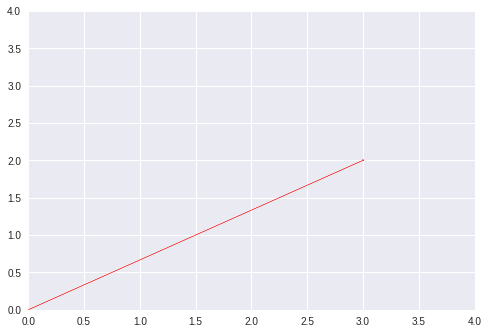

In [3]:
import matplotlib.pyplot as plt
red = [3,2]

plt.arrow(0, 0, red[0], red[1], head_width=.02, head_length=0.01, color = 'r')
plt.xlim([0, 4])
plt.ylim([0, 4])

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
import numpy as np
b = [17,-4,-2,1]

np.linalg.norm(b)

17.60681686165901

The norm of the vector is the non-negative length of the vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [16]:
E = np.array ([[7,4,2],
              [1,3,-1],
              [2,6,-4]])
E.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [17]:
np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [19]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [32]:
##### Your Code Here #####
mean_customers = df.customers.mean()
variance_customers = df.customers.var()
std_customers = df.customers.std()

print("Mean customers =",mean_customers)
print("Variance customers =",variance_customers)
print("Standard deviation customers =",std_customers)

Mean customers = 1135.7142857142858
Variance customers = 98761.90476190478
Standard deviation customers = 314.26406851866597


In [33]:
mean_snow = df.snow.mean()
variance_snow = df.snow.var()
std_snow = df.snow.std()

print("Mean snow =",mean_snow)
print("Variance snow =",variance_snow)
print("Standard deviation snow =",std_snow)

Mean snow = 2.7142857142857144
Variance snow = 8.571428571428571
Standard deviation snow = 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No because they are measuring two completely different things.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [35]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [38]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [39]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [40]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [42]:
from sklearn.preprocessing import StandardScaler
##### Your Code Here #####
standardized = StandardScaler().fit_transform(X)

print(standardized)

[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standardized)
principalDf = pd.DataFrame(data = principalComponents, columns = ['x', 'y'])


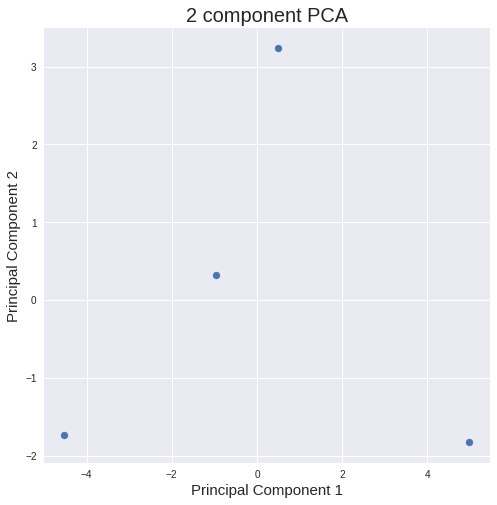

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#principalDf['y'] = principalDf['y']*-1
plt.scatter(principalDf['x'],principalDf['y'])

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [49]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [50]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

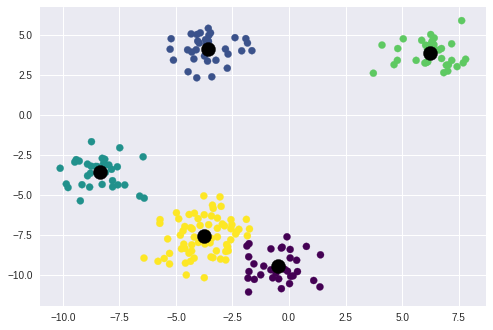

In [57]:
##### Your Code Here #####
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
finalDf_kmeans = kmeans.predict(points)

plt.scatter(points['x'], points['y'], c = finalDf_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200);

In [58]:
print(finalDf_kmeans)

[2 4 0 2 0 4 2 2 1 4 4 4 0 4 2 0 2 4 4 3 2 3 3 3 4 4 0 1 4 4 4 4 0 3 4 4 4
 4 1 0 0 3 1 1 1 4 4 4 2 0 3 2 2 1 3 0 4 1 1 2 3 0 2 1 3 1 3 1 2 1 4 4 4 4
 3 3 4 4 1 3 1 4 4 4 1 4 1 4 4 3 1 4 3 4 0 4 4 4 4 0 4 4 2 4 4 3 2 2 2 3 0
 3 4 2 0 4 1 1 3 1 3 0 4 2 4 2 4 3 1 2 0 2 4 2 1 1 0 3 2 4 1 4 4 3 0 1 4 1
 2 4 4 0 2 3 4 1 0 3 4 2 0 4 1 2 3 3 0 1 0 0 2 0 1 3 0 4 4 4 4 2 4 0 4 4 0
 4 2 3 1 0 4 2 3 2 4 1 3 3 0 0]
